# Proyecto Regresión Logística

Para este proyecto nos apoyaremos en el dataset de [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## Librerías a usar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Procesando los datos

In [3]:
df = pd.read_csv("./data/breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Podemos observar que es te es un problema binomial

In [4]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Eliminar columnas innecesarias

In [6]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

### Eliminar duplicados

In [7]:
df.drop_duplicates(inplace=True)

### Ecaluar nulos

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Procesar datos categóricos

En este caso solo es uno, por lo que vamos a reemplazar los valores con números, recordemos que en Diagnosis (M = malignant, B = benign)

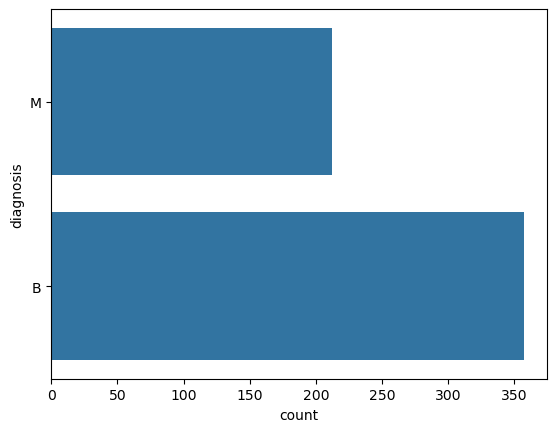

In [9]:
sns.countplot(df.diagnosis)
plt.show()

In [10]:
undersample = RandomUnderSampler(random_state=42)

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_over, y_over = undersample.fit_resample(X, y)

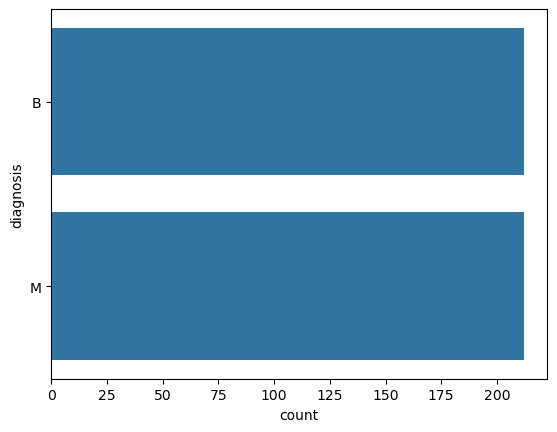

In [11]:
sns.countplot(y_over)
plt.show()

In [12]:
y_over.replace(list(np.unique(y_over)),
               list(range(1, len(np.unique(y_over)) + 1)),
               inplace=True)

In [13]:
df_dea = pd.concat([X_over, y_over], axis=1)
df_dea.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609,1
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468,1
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,1
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,1
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343,1


## Explorando los datos

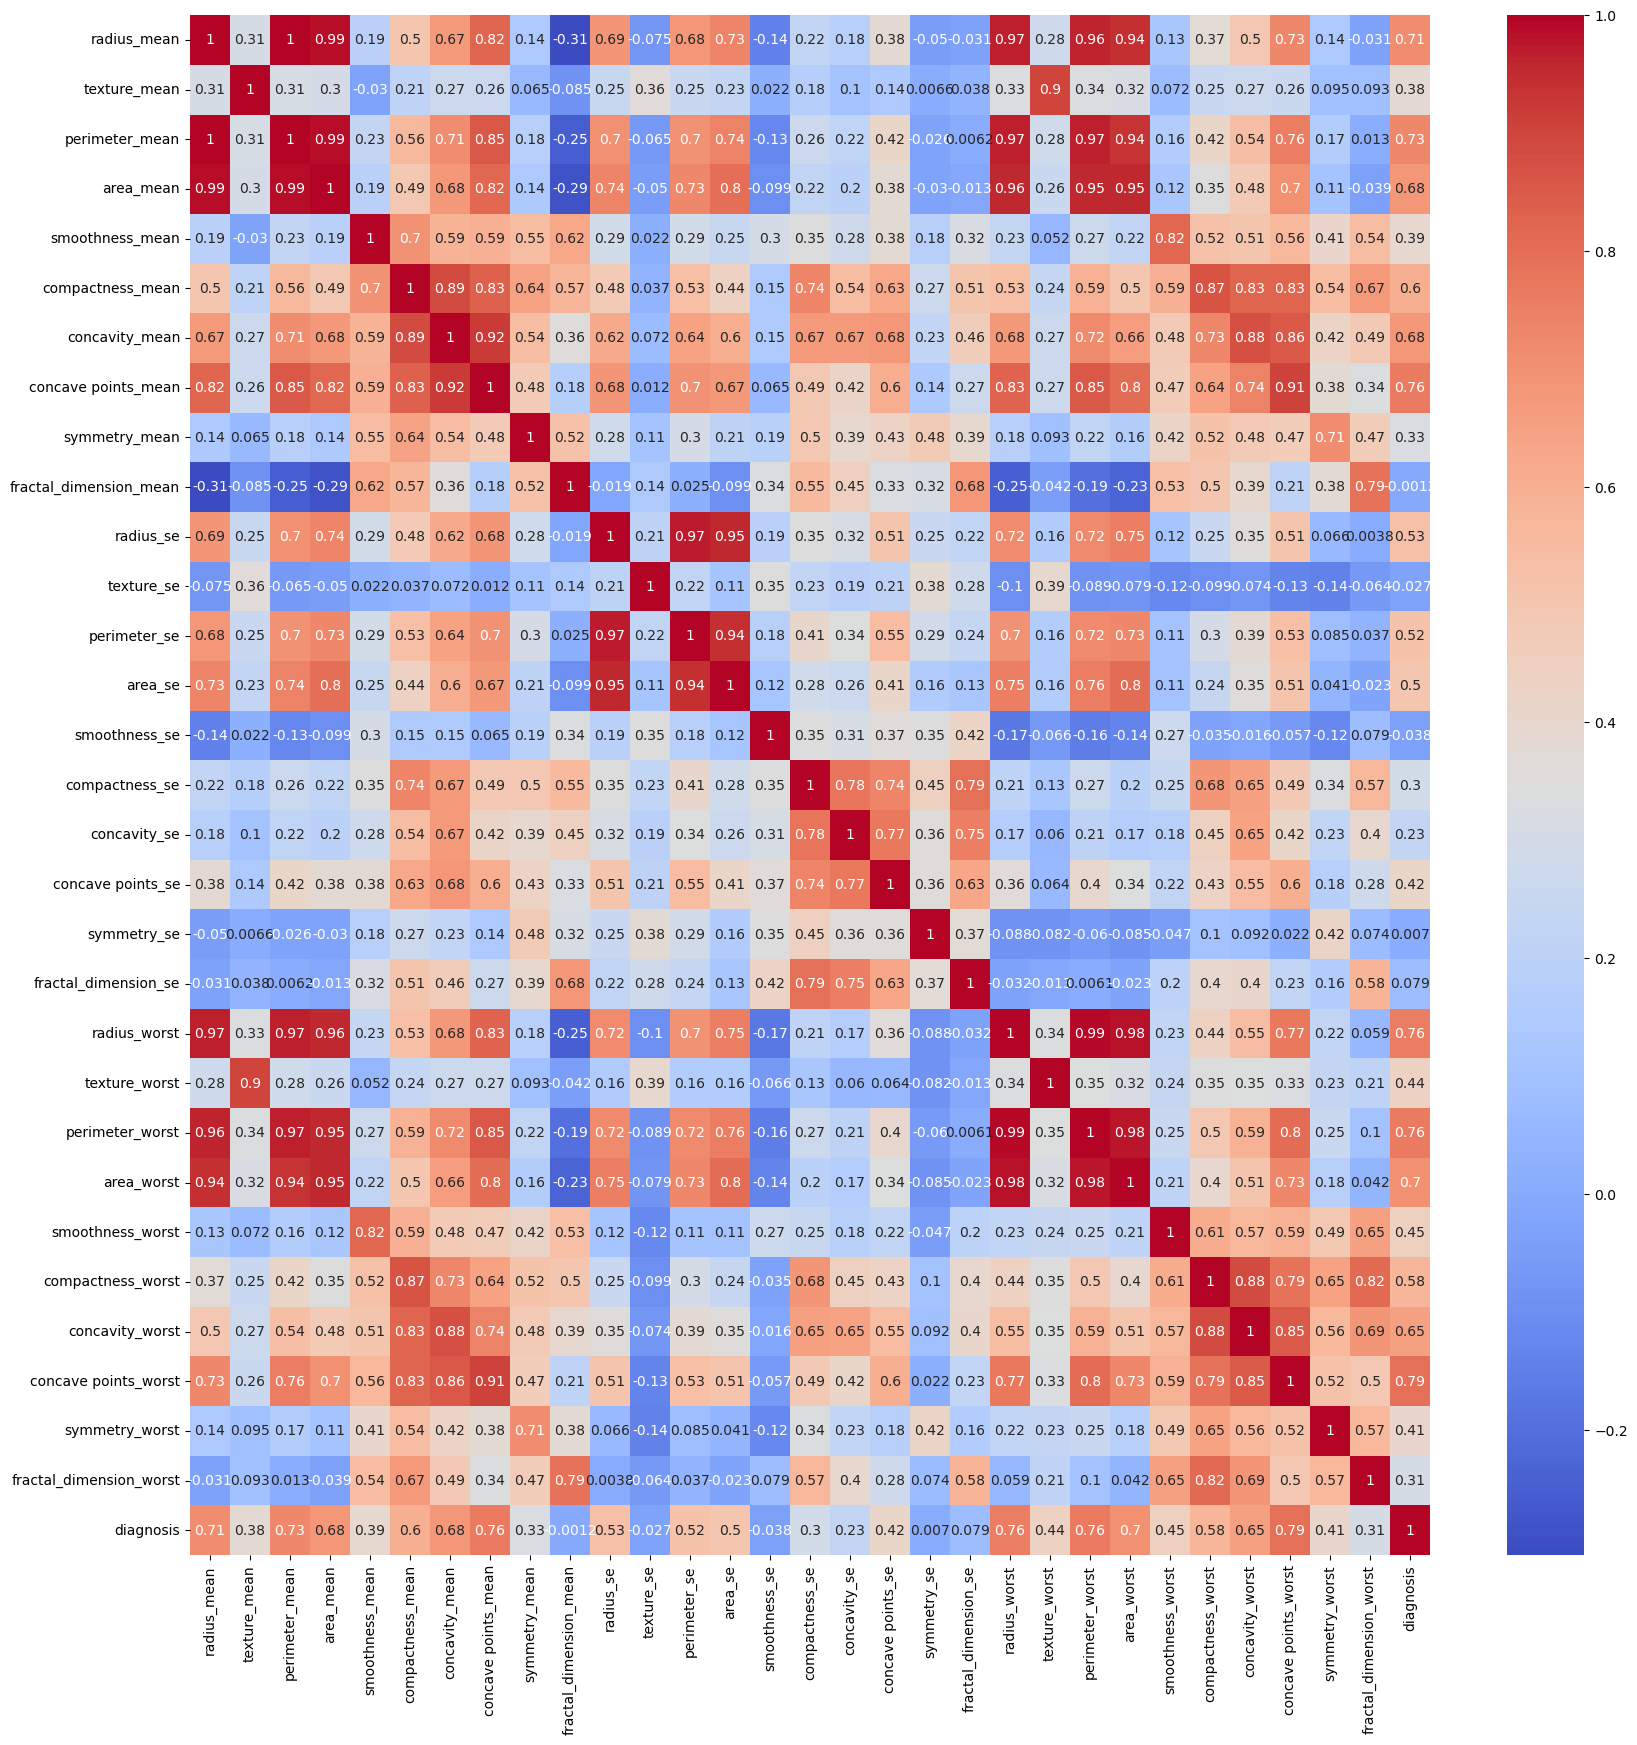

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dea.corr(), annot=True, cmap="coolwarm")
plt.show()

In [15]:
def remove_highly_correlated_features(df, threshold=0.9):
    # Calcula la matriz de correlación
    corr_matrix = df.corr().abs()

    # Obtiene la triangular superior de la matriz de correlación
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Encuentra las características con correlación mayor que el umbral
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Elimina las características altamente correlacionadas
    df_filtered = df.drop(to_drop, axis=1)

    return df_filtered

# Ejemplo de uso
# Supongamos que 'df' es tu DataFrame con todas las variables
# Puedes ajustar el umbral según tus necesidades
df_no_multicollinearity = remove_highly_correlated_features(df_dea, threshold=0.9)
df_no_multicollinearity.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
395,14.060,17.18,0.08045,0.05361,0.026810,0.1641,0.05764,0.1504,1.6850,0.005371,...,0.011320,0.009155,0.01719,0.001444,0.10660,0.12310,0.08460,0.2523,0.06609,1
110,9.777,16.99,0.10370,0.08404,0.043340,0.1584,0.07065,0.4030,1.4240,0.013850,...,0.027220,0.010230,0.03281,0.004638,0.14670,0.17650,0.13000,0.2533,0.08468,1
481,13.900,19.24,0.07991,0.05326,0.029950,0.1579,0.05594,0.3316,0.9264,0.003704,...,0.015300,0.006275,0.01062,0.002217,0.10640,0.14150,0.16730,0.2356,0.07603,1
493,12.460,12.83,0.07372,0.04043,0.007173,0.1613,0.06013,0.3276,1.4860,0.010390,...,0.006416,0.007895,0.02869,0.004821,0.09439,0.06477,0.01674,0.2280,0.07028,1
136,11.710,16.67,0.10510,0.06095,0.035920,0.1339,0.05945,0.4489,2.5080,0.006578,...,0.026620,0.013070,0.01359,0.003707,0.12710,0.10280,0.10460,0.1712,0.07343,1


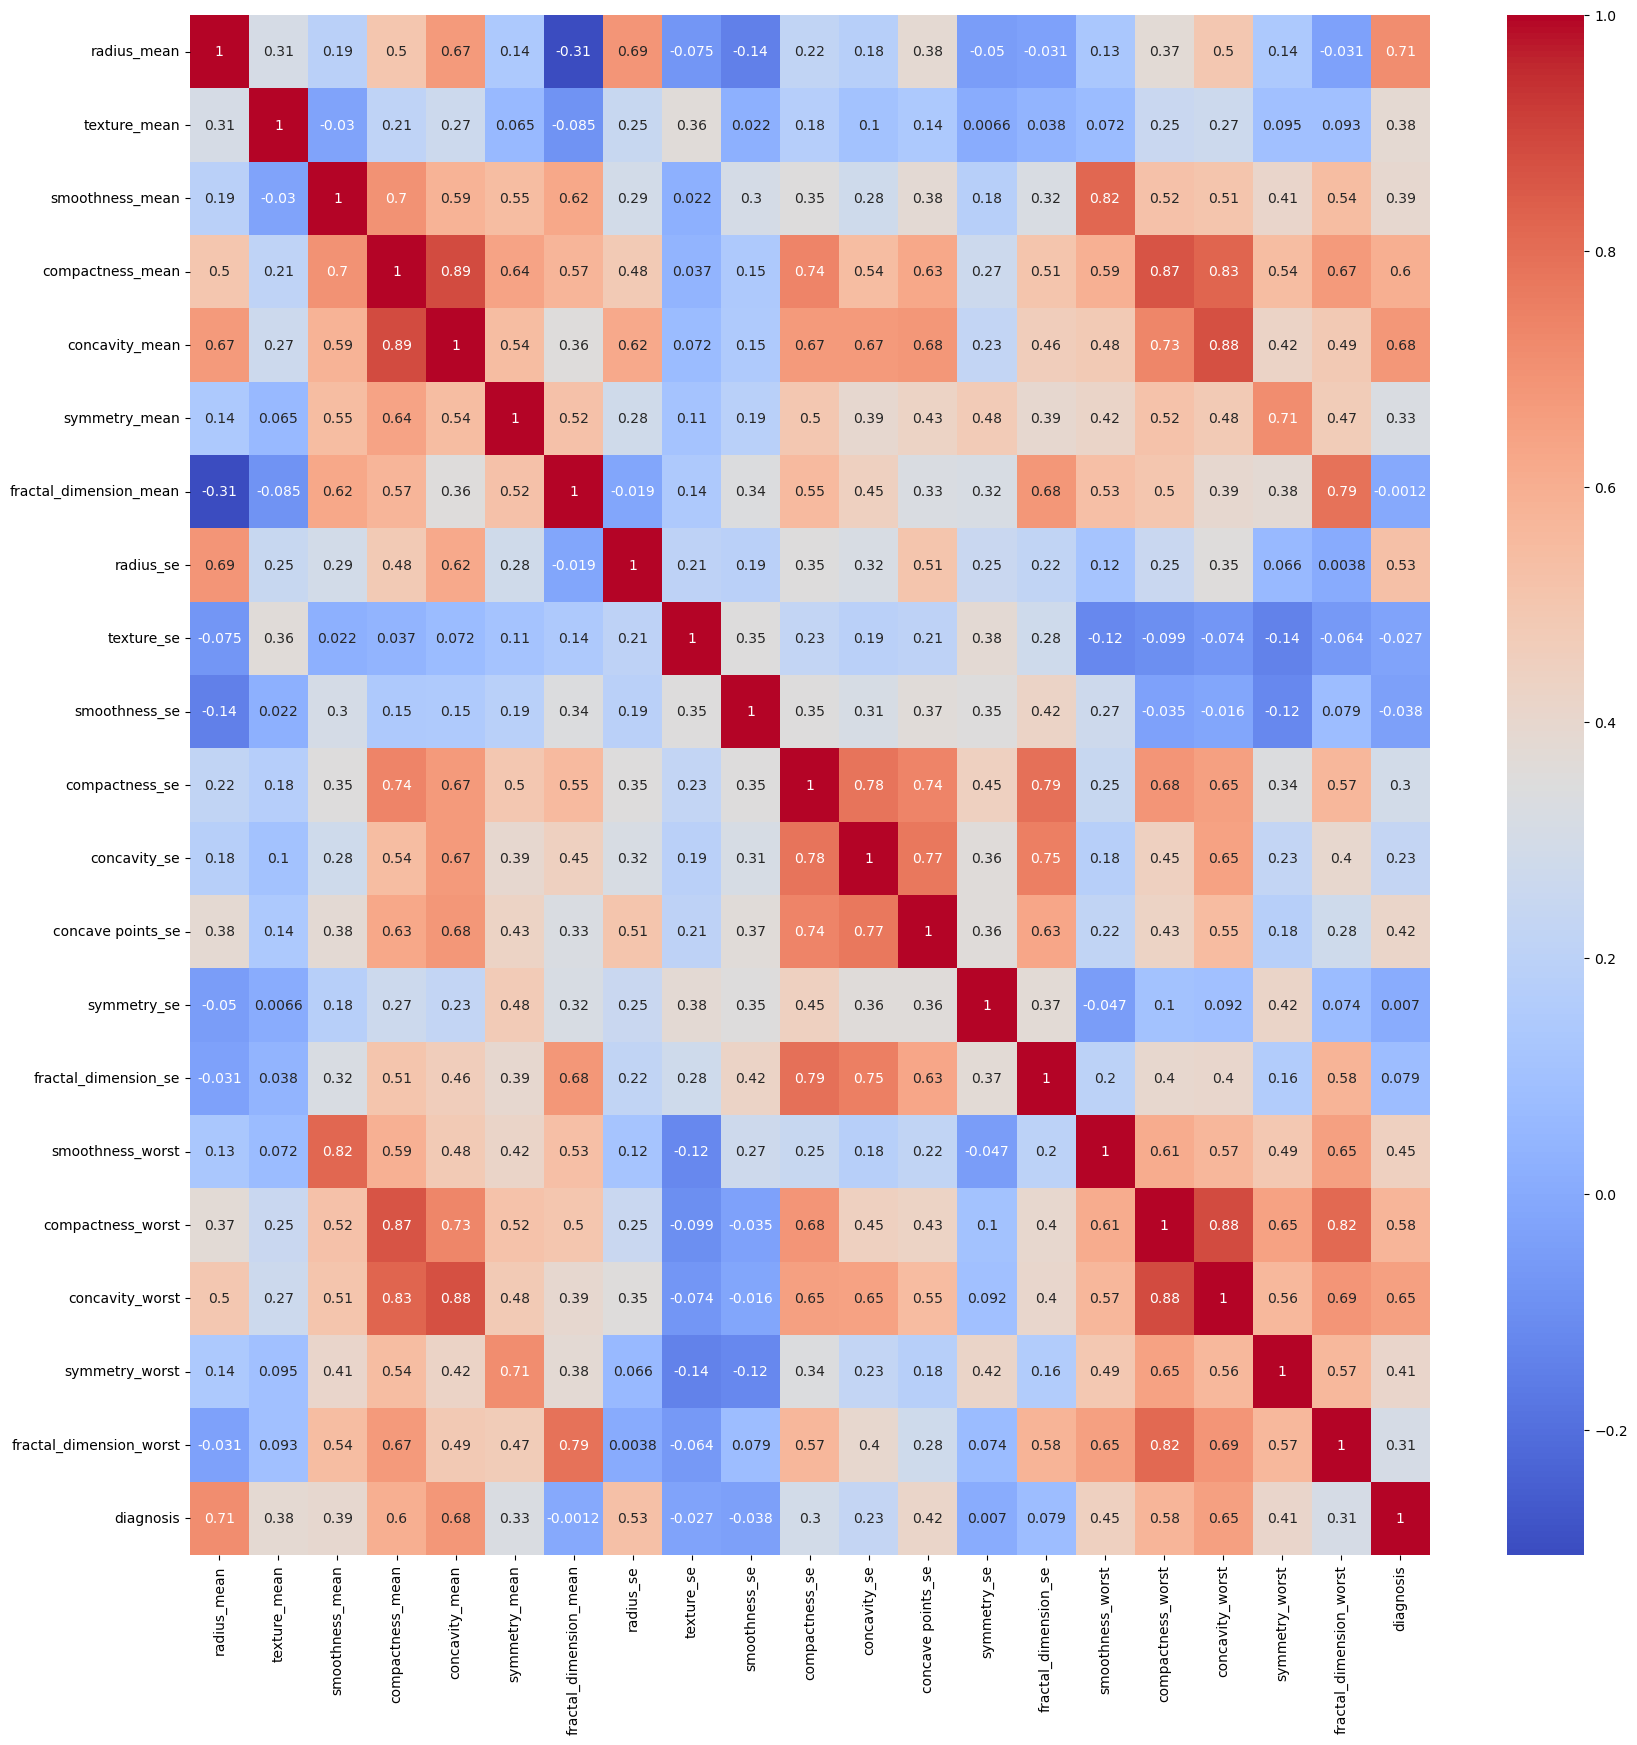

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_no_multicollinearity.corr(), annot=True, cmap="coolwarm")
plt.show()

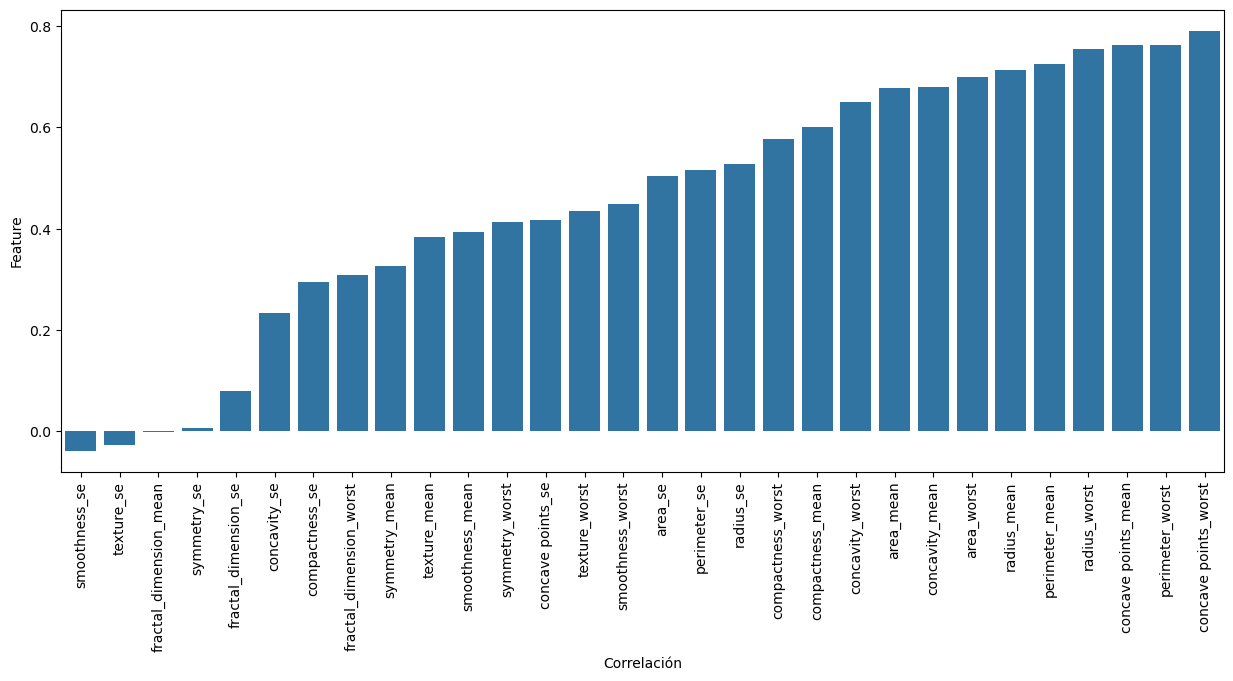

In [17]:
plt.figure(figsize=(15, 6))

sns.barplot(df_dea.corr()["diagnosis"].sort_values()[:-1].reset_index(),
            x="index", y="diagnosis")

plt.xlabel("Correlación")
plt.ylabel("Feature")
plt.xticks(rotation = 90)
plt.show()

## Modelo con multicolinealidad

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42,
                                                    shuffle=True, test_size=.2)

In [19]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [20]:
logistic_regression = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de parámetros óptimos
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [21]:
# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = grid_search.score(X_test, y_test)
print("Exactitud en el conjunto de prueba:", accuracy_test)

Mejores parámetros: {'C': 0.1, 'penalty': 'l2'}
Exactitud en el conjunto de prueba: 0.9882352941176471


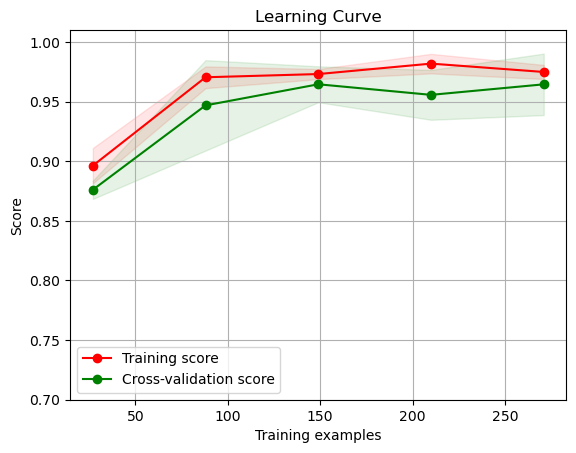

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(grid_search, "Learning Curve", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

In [23]:
kfold = KFold(n_splits=5)

results = cross_val_score(grid_search, X_test, y_test, cv=kfold)
print(results.mean()) # El resultado debe ser similar a nuestro accuracy

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.9529411764705882


### Eligiendo mejores variables

In [24]:
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = df_dea.columns.drop("diagnosis")[selector.get_support()]
selected_features

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

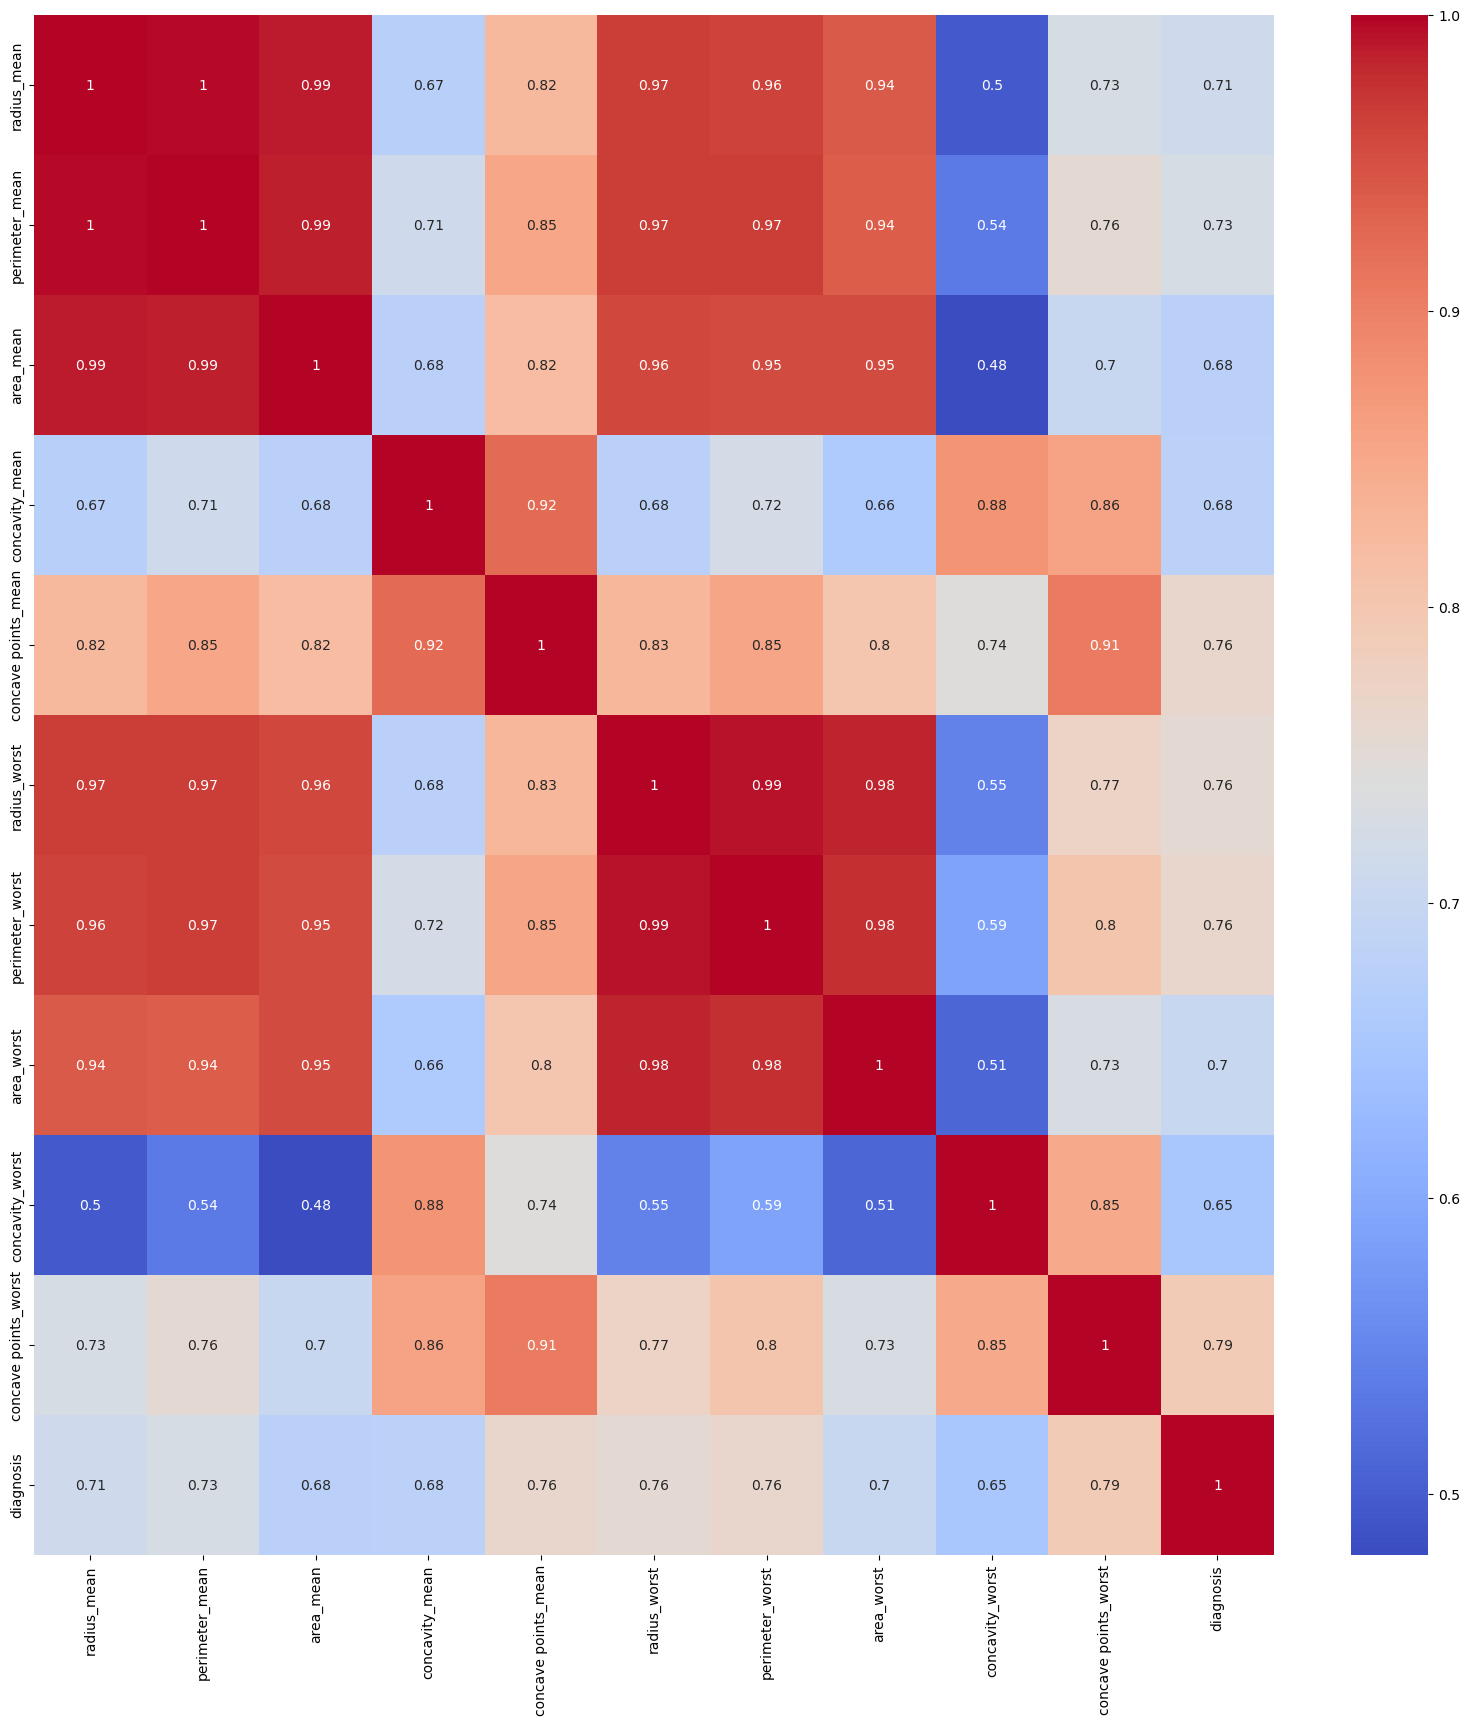

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dea[pd.Index(selected_features.tolist() + ["diagnosis"])].corr(), annot=True, cmap="coolwarm")
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_dea[selected_features],
                                                    df_dea["diagnosis"], random_state=42,
                                                    shuffle=True, test_size=.2)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

logistic_regression = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de parámetros óptimos
grid_search.fit(X_train, y_train)


# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = grid_search.score(X_test, y_test)
print("Exactitud en el conjunto de prueba:", accuracy_test)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Mejores parámetros: {'C': 1000, 'penalty': 'l2'}
Exactitud en el conjunto de prueba: 0.9529411764705882


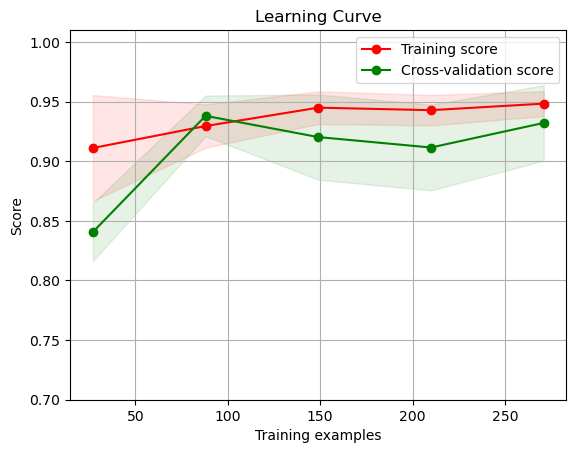

In [27]:
plot_learning_curve(grid_search, "Learning Curve", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

In [28]:
kfold = KFold(n_splits=5)

results = cross_val_score(grid_search, X_test, y_test, cv=kfold)
print(results.mean()) # El resultado debe ser similar a nuestro accuracy

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.9176470588235294


## Modelo sin multicolinealidad

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_no_multicollinearity.drop("diagnosis", axis=1),
                                                    df_no_multicollinearity["diagnosis"], 
                                                    random_state=42,
                                                    shuffle=True, test_size=.2)

In [30]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

logistic_regression = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de parámetros óptimos
grid_search.fit(X_train, y_train)


# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = grid_search.score(X_test, y_test)
print("Exactitud en el conjunto de prueba:", accuracy_test)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


Mejores parámetros: {'C': 0.1, 'penalty': 'l2'}
Exactitud en el conjunto de prueba: 0.9764705882352941


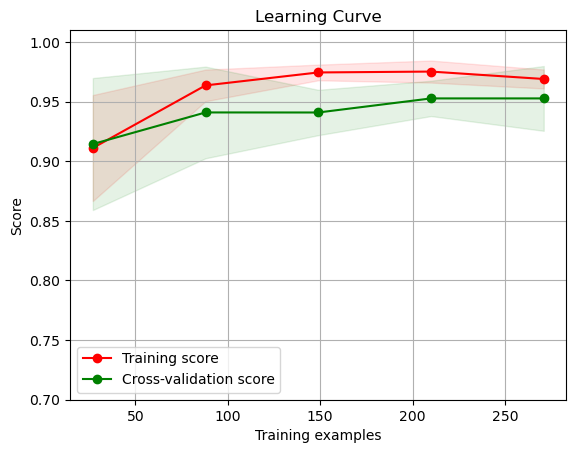

In [31]:
plot_learning_curve(grid_search, "Learning Curve", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

In [32]:
kfold = KFold(n_splits=5)

results = cross_val_score(grid_search, X_test, y_test, cv=kfold)
print(results.mean()) # El resultado debe ser similar a nuestro accuracy

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.9411764705882352
